# Одработка на лабораториска вежба по предметот Машинско учење

## Задача 1

Да се даде пример за модел со протекување на податоци (анг. data leakage).
Да се одбере податочно множество. Да се спореди што се случува кога податоците се делат на train-validation-test подмножества пред да се направи feature engineering, а што ако прво се направи feature engineering а потоа поделба.

Целта е да се види дека во вториот случај можно е data leakage кој ќе предизвика добри тренинг и валидациски резултати, но лоши резултати на тест.

## Содржина
0. [Вчитување на потребни библиотеки](#bib)
1. [Опис на проблемот кој се решава](#opis)
2. [Вчитување и описна статистика на податоците](#stat)
3. [Енкодирање на податоците](#enc)
4. [Додавање на карактеристики](#ccc)
5. [EDA](#eda)
6. [Train-Test Split- Правилен редослед](#split)
7. [Feature Engineering](#Feature)
8. [Тренирање на модел на машинско учење, Презентација на концептот на протекување податоци](#Majko)

### 0. Вчитување на потребни библиотеки

In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install numpy
%pip install scipy


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


plt.style.use("seaborn-v0_8-dark")
warnings.simplefilter(action="ignore")

### 1. Опис на проблемот кој се решава<a id='opis'></a>

Проблемот се состои од развивање на систем за автоматско препознавање на човечки активности (Human Activity Recognition - HAR) преку анализа на податоци од сензори во паметни телефони. Конкретно, задачата е да се изгради модел за класификација кој, врз основа на временски серии од три-осен акцелерометар (X, Y и Z оска), ќе може точно да идентификува една од шесте дефинирани активности: одење, трчање, седење, стоење, качување по скали и симнување по скали.

Неговото значење е огромно во денешниот дигитален свет каде паметните уреди се сеприсутни. Алгоритмите за предвидување на човечка активност отвораат нови можности и придонесуваат кон подобар квалитет на живот:

- [Здравствен мониторинг – следење на физичката активност кај пациенти или стари лица и навремена детекција на падови или аномалии во движењето.](#bib)

- [Фитнес апликации – прецизно мерење на потрошени калории и интензитет на вежбање без потреба од рачно внесување податоци.](#bib)

- [Контекстуална свесност – овозможување на паметните телефони да го прилагодат своето однесување, како исклучување на нотификации при трчање или автоматско вклучување на мапи при одење.](#bib)

Мотивацијата за овој проблем се темели на: Истражувањето на динамиката на човечкото движење преку сензорски податоци. Главниот поттик е решавањето на проблемот на генерализација — како да се научи моделот да препознава „активност“, а не „корисник“. Бидејќи податоците се прибирани од 36 различни луѓе, постои висок ризик за overfitting и data leakage. Совладувањето на овој проблем е клучно за создавање на модел кој е применлив во реалниот свет, каде секој човек се движи на уникатен начин, а моделот мора да биде доволно паметен за да ги препознае универзалните шеми на секоја активност.

### 2. Вчитување и описна статистика на податоците <a id='stat'></a>

In [3]:
Data = pd.read_csv("time_series_data_human_activities.csv")
type(Data)

pandas.core.frame.DataFrame

In [4]:
Data.shape

(1073623, 6)

Множеството содржи 1073623 редови и 6 колони.

In [5]:
Data.head(15)

,user,activity,timestamp,x-axis,y-axis,z-axis
0,1,Walking,4991922345000,0.69,10.80,-2.03
1,1,Walking,4991972333000,6.85,7.44,-0.50
2,1,Walking,4992022351000,0.93,5.63,-0.50
3,1,Walking,4992072339000,-2.11,5.01,-0.69
4,1,Walking,4992122358000,-4.59,4.29,-1.95
5,1,Walking,4992172376000,12.41,11.18,7.82
6,1,Walking,4992222333000,17.27,11.60,5.94
7,1,Walking,4992272321000,1.42,8.43,-5.28
8,1,Walking,4992322339000,-2.68,15.89,-0.38
9,1,Walking,4992372327000,-1.38,9.92,-1.99


Во податочното множество постојат две категориски променливи – user[*] и activity, кои мора да се енкодираат пред моделирање за да бидат разбирливи за алгоритмите. Останатите атрибути (timestamp, x-axis, y-axis, z-axis) се нумерички и можат директно да се користат за анализа. 

[*] Иако user изгледа како нумеричка променлива, но всушност е категориска: бројките се само идентификатори за различни лица, без математичко значење. Доколку оваа карактеристика се третира како нумеричка, моделот може погрешно да претпостави редослед или „ важност“ меѓу корисниците.

In [6]:
Data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073623 entries, 0 to 1073622
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1073623 non-null  int64  
 1   activity   1073623 non-null  object 
 2   timestamp  1073623 non-null  int64  
 3   x-axis     1073623 non-null  float64
 4   y-axis     1073623 non-null  float64
 5   z-axis     1073623 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 49.1+ MB


Можеме да забележиме дека множеството содржи 6 карактеристики со различен тип на податоци. Три од нив (x-axis, y-axis, z-axis) се од тип float64 и претставуваат нумерички вредности од акцелерометар. Две колони (user, timestamp) се од тип int64, но од нив само timestamp е вистински нумерички карактеристика, додека user е категориски идентификатор. Една колона (activity) е од тип object и претставува категорија на активност. 

In [7]:
for column in Data.select_dtypes(include='object').columns:
    print(f"{column}: {Data[column].unique()}")

activity: ['Walking' 'Jogging' 'Upstairs' 'Downstairs' 'Sitting' 'Standing']


По проверка на уникатните вредности кај категориските атрибути, забележуваме дека множеството содржи релативно мал и фиксен број категории. Атрибутите user и activity се категориски: user претставува различни лица (идентификатори) и во документацијата на самото податочно множество е познато дека експериментот е извршен кај 36 лица, додека activity содржи неколку класи на активности (Walking, Jogging, Upstairs, Downstairs, Sitting, Standing). Останатите атрибути (timestamp, x-axis, y-axis, z-axis) се нумерички и можат директно да се користат за анализа, иако timestamp најчесто се трансформира во временски карактеристики. Енкодирањето на категориските променливи ќе биде направено понатаму во оваа секција.

In [8]:
Data.describe()

,user,timestamp,x-axis,y-axis,z-axis
count,1.073623e+06,1.073623e+06,1.073623e+06,1.073623e+06,1.073623e+06
mean,1.880682e+01,3.289157e+13,6.720567e-01,7.332700e+00,4.024567e-01
std,1.028704e+01,4.909825e+13,6.916894e+00,6.732950e+00,4.789301e+00
min,1.000000e+00,7.345234e+10,-1.961000e+01,-1.961000e+01,-1.980000e+01
25%,1.000000e+01,2.057092e+12,-2.960000e+00,3.340000e+00,-2.260978e+00
50%,1.900000e+01,9.750603e+12,3.400000e-01,8.010000e+00,-4.000000e-02
75%,2.800000e+01,3.525530e+13,4.520000e+00,1.160000e+01,2.760000e+00
max,3.600000e+01,2.093974e+14,1.995000e+01,2.004000e+01,1.961000e+01


При набљудување на вредностите, забележуваме дека различните атрибути се на многу различни скали — на пример, timestamp има вредности во редови на 10^13, додека акцелерометарските оски (x-axis, y-axis, z-axis) варираат приближно меѓу -20 и +20. Поради овие големи разлики во скалата, важно е да се направи стандардизација на нумеричките карактеристики пред моделирање.

Пред да продолжиме со стандардизација, ќе провериме дали постојат недостасувачки вредности кои треба да се отстранат или пополнат.

In [9]:
missing_values = Data.apply(lambda x: x.isnull().sum().sum())
print("Number of missing values by country:\n", missing_values)

Number of missing values by country:
 user         0
activity     0
timestamp    0
x-axis       0
y-axis       0
z-axis       0
dtype: int64


При проверка на множеството утврдивме дека нема недостасувачки вредности, што е одлично бидејќи можеме веднаш да преминеме кон следните чекори во предобработката. Пред стандардизација, потребно е да се направи енкодирање на категориската променлива activity, за да биде претставена во нумерички формат погоден за машинско учење. Со тоа ќе се обезбеди правилна структура на податоците и ќе се избегнат погрешни односи меѓу категориите.

### 3. Енкодирање на податоците <a id='enc'></a>

In [10]:
from sklearn.preprocessing import LabelEncoder
data_e=Data.copy()
le_act = LabelEncoder()
y = le_act.fit_transform(data_e['activity'])

## 4. Додавање на карактеристики <a id='ccc'></a>

In [11]:
import numpy as np
data_e['acceleration_magnitude'] = np.sqrt( data_e['x-axis']**2 + data_e['y-axis']**2 + data_e['z-axis']**2 )
print(data_e[['x-axis', 'y-axis', 'z-axis', 'acceleration_magnitude']].head())

   x-axis  y-axis  z-axis  acceleration_magnitude
0    0.69   10.80   -2.03               11.010767
1    6.85    7.44   -0.50               10.125517
2    0.93    5.63   -0.50                5.728159
3   -2.11    5.01   -0.69                5.479808
4   -4.59    4.29   -1.95                6.578351


При обработката на податочното множество, особено кај колоната activity, потребно е да се избере соодветна техника за енкодирање на категоријалните вредности. Во овој случај, изборот на Label Encoding се покажува како најрационално решение.
Прво, алгоритмите базирани на дрва на одлучување (како Random Forest и XGBoost) природно работат со енкодирани класи и не ја интерпретираат вредноста на бројот како големина, туку како услов за поделба. Со тоа се избегнува проблемот на погрешна интерпретација на редоследноста меѓу категориите. Второ, множеството содржи над еден милион записи, па од аспект на мемориска ефикасност Label Encoding е значително подобар избор, бидејќи задржува само една колона со цели броеви, наместо да генерира повеќе нови колони како кај One-Hot Encoding. 

### 5. EDA <a id='eda'></a>

EDA претставува основа врз која понатаму се гради процесот на feature engineering, бидејќи овозможува да се идентификуваат потенцијални проблеми како outliers или невообичаени вредности и да се донесат информирани одлуки за трансформации и креирање нови атрибути. Со ваков пристап се обезбедува методолошки чист редослед: прво анализа и разбирање на податоците, потоа поделба на множеството и конечно примена на соодветни трансформации и моделирање.

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

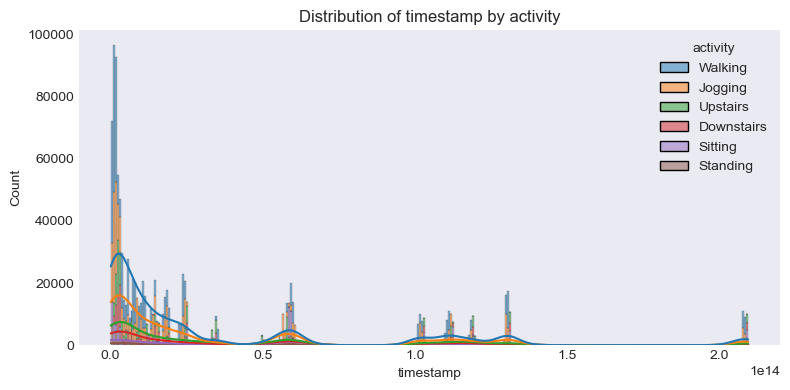

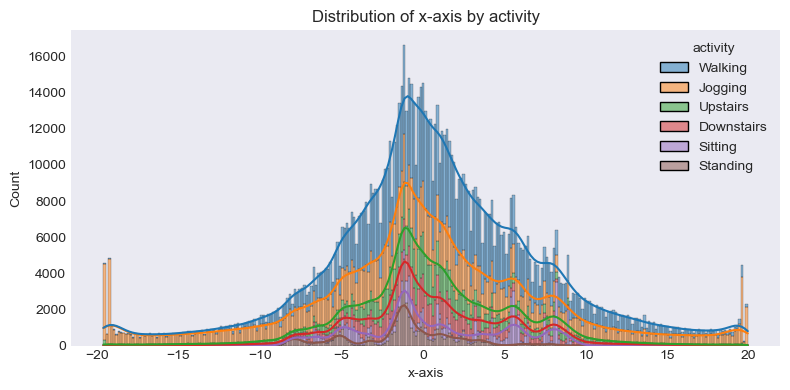

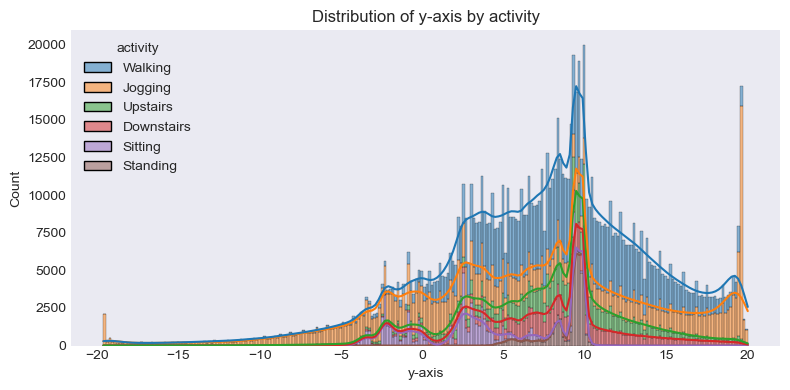

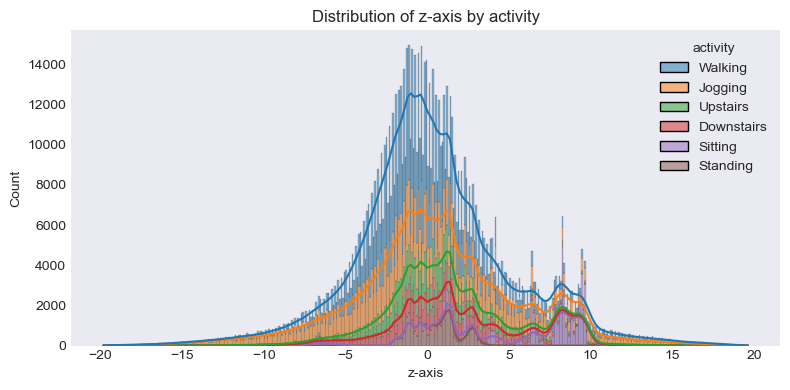

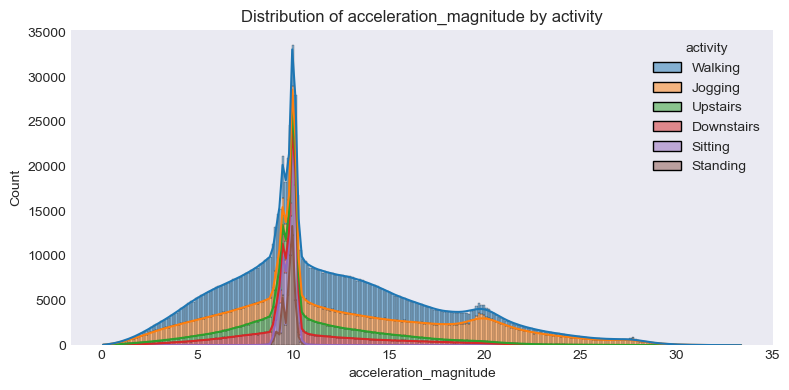

In [13]:
features = ['timestamp','x-axis','y-axis','z-axis','acceleration_magnitude']
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data_e, x=feature, hue='activity', kde=True, multiple='stack')
    plt.title(f'Distribution of {feature} by activity')
    plt.tight_layout()
    plt.show()



Врз основа на визуелизациите на дистрибуциите, може да се извлечат следните клучни заклучоци:

* Дистрибуцијата на **y-оската** јасно ја рефлектира гравитационата константа околу вредноста 10. Ова потврдува дека кај ова множество y-оската е вертикалната оска, што е клучен индикатор за ориентацијата на телефонот при мирување.
* Динамичните активности како **Jogging** и **Walking** покажуваат значително поширок опсег на вредности (поголема варијанса) на сите три оски во споредба со статичните активности (Sitting, Standing), што ја отсликува нивната висока варијабилност во движењето.
* Постои изразено преклопување на формата на кривите меѓу активностите **Upstairs** и **Downstairs**. Ова укажува на фактот дека суровите податоци не се доволни за нивно раздвојување и ја нагласува потребата од понапреден *feature engineering* .
* Анализата на **timestamp** демонстрира дека податоците се прибирани во специфични временски сесии. Дополнително, забележливо е дека класите се неизбалансирани, при што **Walking** е најзастапена активност, што мора да се земе предвид при евалуација на моделот.
*  Разликите во амплитудите помеѓу оските потврдуваат дека е неопходно да се изврши скалирање на податоците за да се спречи доминација на една оска врз процесот на учење на моделот.

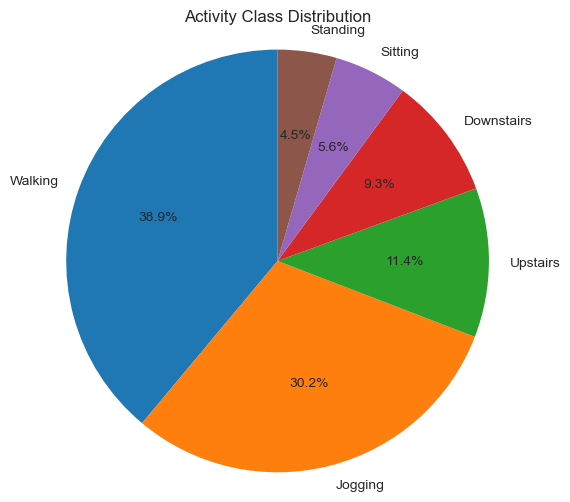

In [14]:
import matplotlib.pyplot as plt

tue_counts = data_e['activity'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(tue_counts, 
        labels=tue_counts.index, 
        autopct='%1.1f%%', 
        startangle=90)
plt.title('Activity Class Distribution')
plt.axis('equal') 
plt.show()

Податоците покажуваат дека акцентот е ставен на динамичните активности. Овој сооднос е типичен за истражувања кои користат сензори на мобилни телефони (на пример, за фитнес апликации), каде што главната цел е да се препознае движењето на корисникот, а не неговото мирување.

### 6.Train–Test Split - Правилен редослед <a id='split'></a>

In [15]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [16]:
data_split=data_e.copy()

In [17]:
data_split.head()

,user,activity,timestamp,x-axis,y-axis,z-axis,acceleration_magnitude
0,1,Walking,4991922345000,0.69,10.80,-2.03,11.010767
1,1,Walking,4991972333000,6.85,7.44,-0.50,10.125517
2,1,Walking,4992022351000,0.93,5.63,-0.50,5.728159
3,1,Walking,4992072339000,-2.11,5.01,-0.69,5.479808
4,1,Walking,4992122358000,-4.59,4.29,-1.95,6.578351


In [18]:
test_users = data_split['user'].unique()[-6:]

In [19]:
train_val_df = data_split[~data_split['user'].isin(test_users)].copy()

In [20]:
test_df = data_split[data_split['user'].isin(test_users)].copy()

In [21]:
X_train_val = train_val_df.drop(columns=['user', 'activity'])
y_train_val = train_val_df['activity']

X_test = test_df.drop(columns=['user', 'activity'])
y_test = test_df['activity']

 Последните шест корисници се издвоени како тест множество, додека сите останати корисници се користат за train+validation множеството.Со оваа стратегија се спречува појава на data leakage, бидејќи ниту еден корисник не се појавува истовремено во тренинг и тест множеството.

### 7. Feature Engineering<a id='Feature'></a>

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
X_train_val_scaled = scaler.fit_transform(X_train_val)
X_test_scaled = scaler.transform(X_test)

Во овој чекор се применува стандардизација со StandardScaler, при што трансформацијата се учи (fit) само врз train множеството.
За потребите на задачата, ќе се разгледа и алтернативниот пристап – стандардизација на целото податочно множество пред поделбата на validation-test. Во таков случај, статистиките (средна вредност и стандардна девијација) се пресметуваат врз сите податоци, вклучувајќи ги и тест примероците. Ова доведува до data leakage, бидејќи моделот индиректно учи од тест множеството уште пред да започне тренингот.Резултатот од ваквиот пристап е нереално добри перформанси на тренинг и валидација, но значително полоши резултати на вистинското тест множество. 

### 8.Тренирање на модел на машинско учење - Random Forest , Презентација на концептот на протекување на податоци<a id='Мајко'></a>


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler


In [28]:
X_bad = data_split.drop(columns=['user', 'activity'])
y_bad = data_split['activity']

In [29]:
scaler_bad = StandardScaler()
X_bad_scaled = scaler_bad.fit_transform(X_bad)

Со примената на fit_transform() врз целото множество, статистичките карактеристики се пресметуваат користејќи ги и тренинг, и податоците за валидација на моделот. Ова доведува до data leakage, бидејќи информациите од примероците за валидација индиректно влијаат врз трансформацијата на тренинг множеството. 

In [30]:
X_train_bad, X_val_bad, y_train_bad, y_val_bad = train_test_split(
    X_bad_scaled, y_bad, test_size=0.2, random_state=42, stratify=y_bad
)

In [31]:
rf_bad = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42
)

In [32]:
rf_bad.fit(X_train_bad, y_train_bad)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
y_val_pred_bad = rf_bad.predict(X_val_bad)

In [34]:
print("Предвудување на валидацискиот сет со протекување на поодатици")
print("Balanced accuracy:", balanced_accuracy_score(y_val_bad, y_val_pred_bad))
print(classification_report(y_val_bad, y_val_pred_bad))

Предвудување на валидацискиот сет со протекување на поодатици
Balanced accuracy: 0.8837560102334319
              precision    recall  f1-score   support

  Downstairs       0.83      0.70      0.76     20038
     Jogging       0.92      0.90      0.91     64920
     Sitting       1.00      1.00      1.00     11988
    Standing       0.99      0.98      0.99      9679
    Upstairs       0.83      0.77      0.80     24520
     Walking       0.89      0.95      0.92     83580

    accuracy                           0.90    214725
   macro avg       0.91      0.88      0.89    214725
weighted avg       0.89      0.90      0.89    214725



In [35]:
y_test_pred_bad = rf_bad.predict(X_test_scaled)

In [36]:
print("Предвидување на тест сетот- невидените 6 корисници за алгоритмот")
print("Balanced accuracy:", balanced_accuracy_score(y_test, y_test_pred_bad))
print(classification_report(y_test, y_test_pred_bad))


Предвидување на тест сетот- невидените 6 корисници за алгоритмот
Balanced accuracy: 0.3284732133530298
              precision    recall  f1-score   support

  Downstairs       0.16      0.24      0.19     17658
     Jogging       0.58      0.41      0.48     64590
     Sitting       1.00      0.53      0.69     14129
    Standing       0.97      0.10      0.19     10236
    Upstairs       0.16      0.04      0.07     20040
     Walking       0.41      0.65      0.50     70888

    accuracy                           0.43    197541
   macro avg       0.55      0.33      0.35    197541
weighted avg       0.49      0.43      0.42    197541



Иако моделот покажува висока balanced accuracy на валидациското множество, истата значително опаѓа при евалуација на тест множеството составено од целосно невидени корисници.
Ова укажува дека моделот научил статистички карактеристики од валидациската дистрибуција, што е класичен пример за data leakage.

За реално да уште подобро да ја увидиме последицата од протекувањето на податоци, во плилог се исцртани матриците на конфузија.

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


Матрица на конфузија (збунетост) за валидациско множество

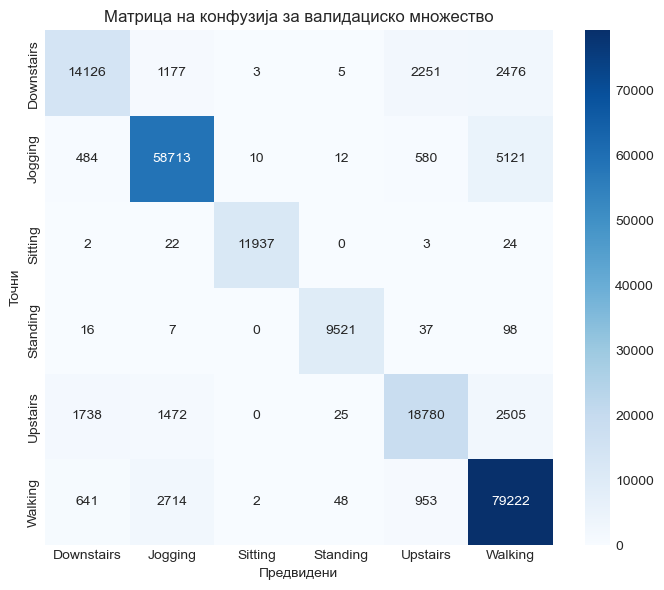

In [43]:
cm_val = confusion_matrix(y_val_bad, y_val_pred_bad, labels=rf_bad.classes_)

plt.figure(figsize=(7, 6))
sns.heatmap(
    cm_val,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=rf_bad.classes_,
    yticklabels=rf_bad.classes_
)
plt.title("Матрица на конфузија за валидациско множество")
plt.xlabel("Предвидени")
plt.ylabel("Точни")
plt.tight_layout()
plt.show()

Матрица на конфузија за тест множество

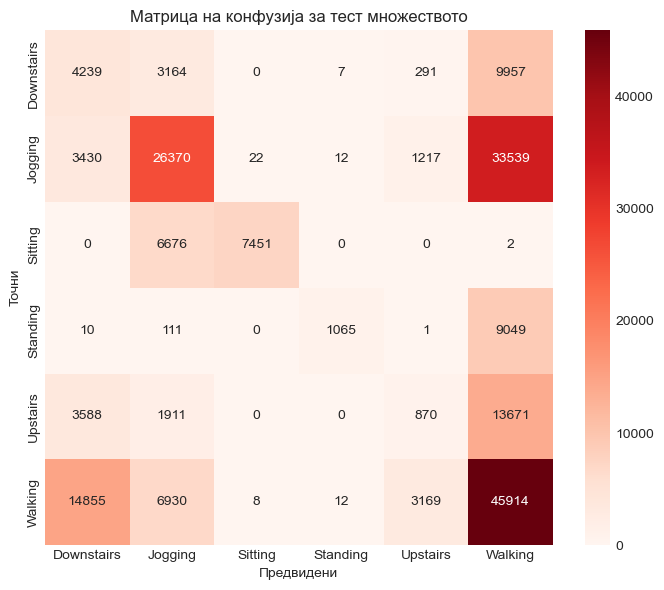

In [45]:
cm_test = confusion_matrix(y_test, y_test_pred_bad, labels=rf_bad.classes_)

plt.figure(figsize=(7, 6))
sns.heatmap(
    cm_test,
    annot=True,
    fmt='d',
    cmap='Reds',
    xticklabels=rf_bad.classes_,
    yticklabels=rf_bad.classes_
)
plt.title("Матрица на конфузија за тест множеството")
plt.xlabel("Предвидени")
plt.ylabel("Точни")
plt.tight_layout()
plt.show()

Кај валидациското множество матрицата на конфузија покажува доминантна дијагонала, што укажува на нереално добра класификација (имаме 6 небалансирани класи, репрезентација на ова е погорниот пита дијаграм).
Кај тест множеството (последните 6 корисници) се забележува силно распрскување надвор од дијагоналата, што значи дека моделот не генерализира.
Оваа драстична разлика е директна последица на data leakage

### Заклучок

Во добиените резултати јасно се гледа проблемот на data leakage. На валидациското множество моделот постигнува многу високи метрики (balanced accuracy ≈ 0.88), но на тест множеството перформансите нагло паѓаат (balanced accuracy ≈ 0.33). Оваа голема разлика се јавува затоа што стандардизацијата е направена врз целото множество пред поделбата, па статистичките податоци од  примероците за валидација индиректно влијаат врз тренинг процесот.

Со тоа моделот „учи“ информации што во реална примена не би ги имал на располагање, па резултатите на валидација изгледаат подобри отколку што навистина се. На тест множеството, кое претставува група вистински невидени корисници, перформансите се значително полоши, особено кај класите Standing и Upstairs.

Кога StandardScaler се применува врз целото множество пред поделбата, параметрите за скалирање (средна вредност и стандардна девијација) се пресметуваат врз сите податоци, вклучувајќи ги и валидациските примероци. Така, и статистичките податоци од валидацијата се приклучени кон оние за тренинг (статистиката е вкупно пресметана за овие 2 множества), што претставува скриена форма на leakage. Во литературата, ова се опишува како „контаминација на тест множеството“,  која води до „надувани“ метрики и нереална проценка.

Правилната постапка е прво да се направи поделба на податоците на train–validation–test, а потоа сите чекори на предобработка ( да се применат само врз тренинг множеството. Истите параметри потоа се користат за трансформација на валидациското и тест множеството. На овој начин се избегнува leakage и се добива реална проценка за генерализација на моделот.